For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

H0 - There has been no difference in network latency since switching internet service providers.
Ha - There is a noticeable increase in network latency since switching ISPs.

True Positive - We are confident that there is a noticeable increase in network latency (and there is a network latency)
True Negative - We fail to reject the null hypothesis (and there is no actual difference in latency)
Type I Error - We are confident that there is a noticeable increase in network latency (but there isn't actually)
Type II Error - We fail to reject the null hypothesis (but there was an actual difference/increase in latency).

Is the website redesign any good?

H0 - There has been no difference in website traffic since the website redesign was deployed.
Ha - There has been an increase in website traffic since the website redesign was deployed.

True Positive - We are confident that there is an increase in website traffice since the redesign was deployed (and there is an actual increase in traffic).
True Negative - We fail to reject the null hypothesis (and there is no actual difference in website traffic).
Type I Error - We are confident that there is an increase (but there wasn't actually a difference)
Type II Error - We fail to reject the null hypothesis (but there actually was a difference in website traffic).

Is our television ad driving more sales?

H0 - There has been no difference in sales since the television ad was aired.
Ha - There has been an increase in sales since the television ad was aired.

True Positive - We are confident that there is an increase in sales since the ad was aired (and there is an increase in sales since ad was aired).
True Negative - We fail to reject the null hypothesis (and there is no actual difference in sales since it was aired).
Type I Error - We are confident that there is an increase in sales (but there wasn't actually a difference). 
Type II Error - We fail to reject the null hypothesis (but there was a difference/increase since it aired).

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?

> One-Sample T Test, Two-Tail (since we're looking for any difference)

- Are adults who drink milk taller than adults who dont drink milk?

> Two-Sample T Test, One-Tail (since we're looking for taller, i.e. one-way)

- Is the the price of gas higher in texas or in new mexico?

> Two-Sample T Test, One-Tail (since we're looking for higher, i.e. one-way)

- Are there differences in stress levels between students who take data science vs students who take web development 
vs students who take cloud academy?

> ANOVA, Two-Tail (since we're looking for any difference)

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [76]:
office_1 = np.random.normal(90, 15, 40)
office_2 = np.random.normal(100, 20, 50)

$H_0$: Mean of average time to sell homes for office 1 = that of office 2

$H_a$: There is a difference in the average time to sell homes for office 1 and office 2

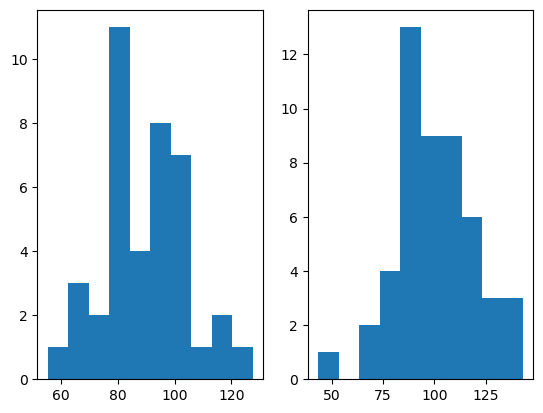

In [77]:
plt.subplot(121) # Just to plot histograms to verify normal(ish) distribution after putting values in np.random.normal()
plt.hist(office_1)

plt.subplot(122)
plt.hist(office_2)
plt.show()

In [78]:
office_1.var(), office_2.var() #Checking for whether variances are equal or different to set in 2-sample t test function

(227.997153290838, 366.52880217039694)

In [79]:
stats.levene(office_1, office_2) #Because p-value is so high, we will set equal_var equal to True (default, so no need to state explicitly)

LeveneResult(statistic=1.1562406173229618, pvalue=0.2851859313038022)

In [80]:
α = 0.05
ttest, p = stats.ttest_ind(office_1, office_2)

In [81]:
ttest, p

(-2.622578403136792, 0.010283679581180373)

In [82]:
if p > α:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


3. Load the mpg dataset and use it to answer the following questions:

In [33]:
from pydataset import data

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [39]:
mpg['avg_mileage'] = mpg[['cty','hwy']].mean(axis=1) #To compare fuel effiency in cars for following questions

In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$: There is no difference in fuel-efficiency in cars from 2008 and 1999.

$H_\alpha$: There is a difference between the two.

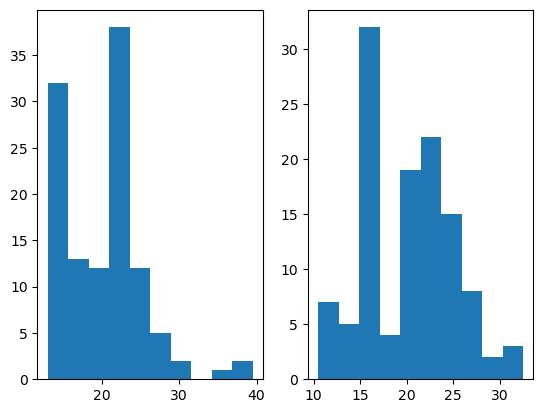

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)
1999    117
2008    117
Name: year, dtype: int64


In [68]:
# Several checks here. 
# 1) Check for normal-ish distribution.
# 2) Check value counts to ensure sample size above 30.
# 3) Check variance to determine whether I want to put equal_var = False to the above.

plt.subplot(121)
plt.hist(mpg.avg_mileage[mpg.year == 1999])
plt.subplot(122)
plt.hist(mpg.avg_mileage[mpg.year == 2008])
plt.show()

print(stats.levene((mpg.avg_mileage[mpg.year == 1999]),(mpg.avg_mileage[mpg.year == 2008])))
print(mpg.year.value_counts())

Because the p-value is greater than α, we'll put equal_var set to True (i.e. not put anything since True is default).

In [71]:
stats.ttest_ind((mpg.avg_mileage[mpg.year == 1999]),(mpg.avg_mileage[mpg.year == 2008]))

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

Because the p-value is greater than .05, we fail to reject the null hypothesis.

I.e. there is no difference in fuel effciency between cars produced in 1998 vs. 2008.

In [83]:
# Are compact cars more fuel-efficient than the average car?

$H_0$: There is no difference in efficiency between compact cars and the average car.

$H_\alpha$: Compact cars are more fuel-efficient than the average car.

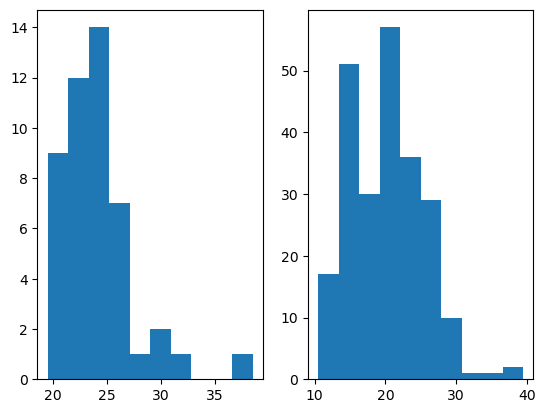

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64


In [75]:
# Same checks as above exccept for Levene test.

plt.subplot(121)
plt.hist(mpg.avg_mileage[mpg['class'] == 'compact'])
plt.subplot(122)
plt.hist(mpg.avg_mileage)
plt.show()

# No need for Levene test since it's a one-sample t-test
print(mpg['class'].value_counts())

In [74]:
#Because we're comparing to the average car, just one-sample t test is needed.

stats.ttest_1samp((mpg.avg_mileage[mpg['class'] == 'compact']), (mpg.avg_mileage).mean())

Ttest_1sampResult(statistic=7.896888573132533, pvalue=4.198563794317163e-10)

Because p-value is so low, we can reject the null hypothesis.

In [60]:
# Do manual cars get better gas mileage than automatic cars?

mpg['auto_man'] = np.where(mpg.trans.str.contains('auto'), 'auto', 'man')

#To get classes of transmission type

In [63]:
mpg.auto_man.value_counts() #to check if we can state if there are enough samples to assume normal distribution

auto    157
man      77
Name: auto_man, dtype: int64

In [85]:
stats.levene((mpg.avg_mileage[mpg.auto_man == 'man']),(mpg.avg_mileage[mpg.auto_man == 'auto'])) #equal_var is True

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [86]:
stats.ttest_ind((mpg.avg_mileage[mpg.auto_man == 'man']),(mpg.avg_mileage[mpg.auto_man == 'auto']))

Ttest_indResult(statistic=4.593437735750014, pvalue=7.154374401145683e-06)

Because we're looking at a "certain direction" (i.e. whether manual gets better/higher mpg than auto), we will check to see if p-value divided by two is less than the alpha. Since the p-value is lower than .025 (alpha is .05), then we can reject the null hypothesis.